In [1]:
# 1 Imports & Config  (inside 02_sector_cumrets.ipynb)
import yfinance as yf
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path
import sys, pathlib
sys.path.append(str(pathlib.Path.cwd().parent))   # add ../ to import path
import utils                            # your helper functions

# ---- Sector ETF tickers (11 GICS sectors) ----
SECTORS = [
    "XLC",  # Communication Svcs
    "XLY",  # Consumer Discretionary
    "XLP",  # Consumer Staples
    "XLE",  # Energy
    "XLF",  # Financials
    "XLV",  # Health Care
    "XLI",  # Industrials
    "XLB",  # Materials
    "XLRE", # Real Estate
    "XLK",  # Technology
    "XLU"   # Utilities
]



In [2]:
TICKERS = SECTORS
START   = "2014-01-01"
DATA_DIR = Path("../data/raw_yfinance/sector")
DATA_DIR.mkdir(parents=True, exist_ok=True)
CACHE = DATA_DIR / "sector_prices.parquet"

In [3]:
if CACHE.exists():
    raw = pd.read_parquet(CACHE)
else:
    raw = (
        yf.download(TICKERS, start=START, auto_adjust=True, progress=False, group_by="column")
          .dropna(how="all")
    )
    raw.to_parquet(CACHE)
print("Downloaded sector prices to:", CACHE)

prices = raw["Close"].dropna(how="all")

# At this point `prices.columns` == ["XLC", "XLY", "XLP", ..., "XLU"]
prices.head()


Downloaded sector prices to: ..\data\raw_yfinance\sector\sector_prices.parquet


Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2014-01-02,36.577644,NaN,56.661121,14.284986,41.894501,30.624676,31.548735,NaN,25.855595,45.982079,58.411655
2014-01-03,36.489902,NaN,56.453323,14.383545,42.008331,30.477570,31.489279,NaN,25.772610,46.090496,58.253597
2014-01-06,36.290462,NaN,56.531269,14.396686,41.764423,30.425636,31.370359,NaN,25.814108,45.898685,57.893581
2014-01-07,36.226635,NaN,56.959869,14.403255,42.024578,30.702553,31.541296,NaN,26.042301,46.382427,58.244835
2014-01-08,36.442028,NaN,56.563713,14.449249,41.951412,30.702553,31.303473,NaN,25.903999,46.791130,58.086784


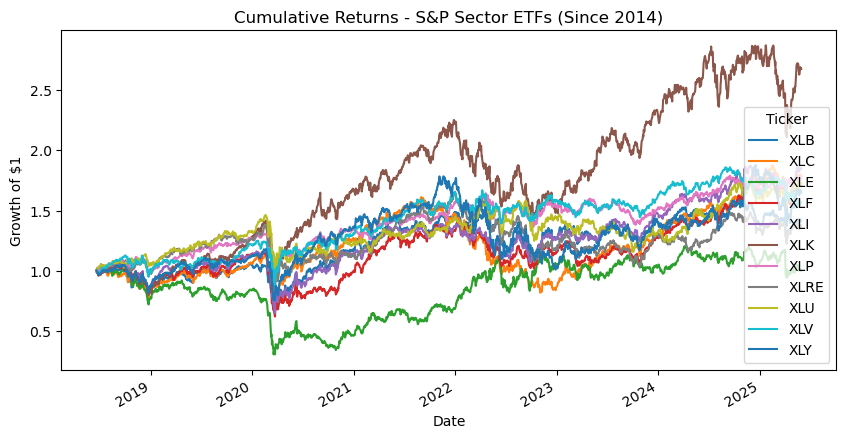

Final values of $1 invested in each sector ETF: Ticker
XLB     1.416350
XLC     1.790363
XLE     1.000608
XLF     1.724311
XLI     1.847414
XLK     2.672544
XLP     1.777983
XLRE    1.381423
XLU     1.728850
XLV     1.570119
XLY     1.649247
Name: 2025-05-30 00:00:00, dtype: float64


In [4]:
rets = np.log(prices / prices.shift(1)).dropna()
cum = (rets + 1).cumprod()
cum.plot(figsize=(10,5))
plt.title("Cumulative Returns - S&P Sector ETFs (Since 2014)")
plt.ylabel("Growth of $1")
plt.show()

final_values = cum.iloc[-1]
print("Final values of $1 invested in each sector ETF:", final_values)

In [5]:
summary = pd.DataFrame({
    "Ann. Vol": rets.apply(utils.annualised_volatility),
    "Sharpe": rets.apply(utils.sharpe_ratio),
}).sort_values("Sharpe", ascending=False)
display(summary.style.format({"Ann. Vol":"{:.2%}", "Sharpe":"{:.2f}"}))


,Ann. Vol,Sharpe
Ticker,,
XLK,27.24%,0.66
XLP,16.00%,0.60
XLI,22.19%,0.51
XLU,21.26%,0.48
XLC,23.28%,0.48
XLV,17.79%,0.46
XLF,24.55%,0.44
XLY,24.78%,0.42
XLB,22.72%,0.34
